In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import folium

In [8]:
crime = pd.read_csv('Chicago_Crimes_2012_to_2017.csv')

crime_step_sampling =  crime.groupby('Year').sample(n=1000, replace=True, random_state=42)

delete_list = ['Unnamed: 0', 'ID', 'Case Number', 'IUCR', 'Location', 'X Coordinate', 'Y Coordinate', 'Updated On']
crime_analyse = crime_step_sampling.drop(columns=delete_list)

In [9]:
crime_analyse.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude
198549,05/21/2012 10:20:00 AM,055XX S WENTWORTH AVE,ASSAULT,SIMPLE,STREET,False,True,225,2.0,3.0,68.0,08A,2012,41.794040,-87.630501
223458,06/14/2012 07:00:00 PM,044XX W 45TH ST,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),False,False,815,8.0,14.0,57.0,06,2012,41.811395,-87.734249
208523,05/24/2012 08:00:00 AM,069XX N ASHLAND BLVD,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,2431,24.0,49.0,1.0,10,2012,42.007117,-87.670007
335769,10/09/2012 02:30:00 AM,003XX N DEARBORN ST,THEFT,$500 AND UNDER,SIDEWALK,True,False,1831,18.0,42.0,8.0,06,2012,41.888170,-87.629548
196470,05/18/2012 10:10:00 PM,013XX W FULLERTON AVE,BATTERY,SIMPLE,ATHLETIC CLUB,False,False,1932,19.0,32.0,7.0,08B,2012,41.925246,-87.661433


In [11]:
crime_analyse.Date = pd.to_datetime(crime_analyse.Date, format='%m/%d/%Y %I:%M:%S %p')
crime_analyse.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude
198549,2012-05-21 10:20:00,055XX S WENTWORTH AVE,ASSAULT,SIMPLE,STREET,False,True,225,2.0,3.0,68.0,08A,2012,41.794040,-87.630501
223458,2012-06-14 19:00:00,044XX W 45TH ST,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),False,False,815,8.0,14.0,57.0,06,2012,41.811395,-87.734249
208523,2012-05-24 08:00:00,069XX N ASHLAND BLVD,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,2431,24.0,49.0,1.0,10,2012,42.007117,-87.670007
335769,2012-10-09 02:30:00,003XX N DEARBORN ST,THEFT,$500 AND UNDER,SIDEWALK,True,False,1831,18.0,42.0,8.0,06,2012,41.888170,-87.629548
196470,2012-05-18 22:10:00,013XX W FULLERTON AVE,BATTERY,SIMPLE,ATHLETIC CLUB,False,False,1932,19.0,32.0,7.0,08B,2012,41.925246,-87.661433


In [12]:
crime_analyse['Year']=pd.DatetimeIndex(crime_analyse['Date']).year
crime_analyse['Month']=pd.DatetimeIndex(crime_analyse['Date']).month
crime_analyse['Time']=crime_analyse['Date'].dt.time

In [13]:
crime_analyse.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Month,Time
198549,2012-05-21 10:20:00,055XX S WENTWORTH AVE,ASSAULT,SIMPLE,STREET,False,True,225,2.0,3.0,68.0,08A,2012,41.794040,-87.630501,5,10:20:00
223458,2012-06-14 19:00:00,044XX W 45TH ST,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),False,False,815,8.0,14.0,57.0,06,2012,41.811395,-87.734249,6,19:00:00
208523,2012-05-24 08:00:00,069XX N ASHLAND BLVD,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,2431,24.0,49.0,1.0,10,2012,42.007117,-87.670007,5,08:00:00
335769,2012-10-09 02:30:00,003XX N DEARBORN ST,THEFT,$500 AND UNDER,SIDEWALK,True,False,1831,18.0,42.0,8.0,06,2012,41.888170,-87.629548,10,02:30:00
196470,2012-05-18 22:10:00,013XX W FULLERTON AVE,BATTERY,SIMPLE,ATHLETIC CLUB,False,False,1932,19.0,32.0,7.0,08B,2012,41.925246,-87.661433,5,22:10:00


In [14]:
month_=['January','February','March','April','May','June','July','August','September','October','November','December']

def change(num):
  return month_[num-1]

crime_analyse['Month_n']=crime_analyse['Month'].apply(change)

crime_analyse.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Month,Time,Month_n
198549,2012-05-21 10:20:00,055XX S WENTWORTH AVE,ASSAULT,SIMPLE,STREET,False,True,225,2.0,3.0,68.0,08A,2012,41.794040,-87.630501,5,10:20:00,May
223458,2012-06-14 19:00:00,044XX W 45TH ST,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),False,False,815,8.0,14.0,57.0,06,2012,41.811395,-87.734249,6,19:00:00,June
208523,2012-05-24 08:00:00,069XX N ASHLAND BLVD,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,2431,24.0,49.0,1.0,10,2012,42.007117,-87.670007,5,08:00:00,May
335769,2012-10-09 02:30:00,003XX N DEARBORN ST,THEFT,$500 AND UNDER,SIDEWALK,True,False,1831,18.0,42.0,8.0,06,2012,41.888170,-87.629548,10,02:30:00,October
196470,2012-05-18 22:10:00,013XX W FULLERTON AVE,BATTERY,SIMPLE,ATHLETIC CLUB,False,False,1932,19.0,32.0,7.0,08B,2012,41.925246,-87.661433,5,22:10:00,May


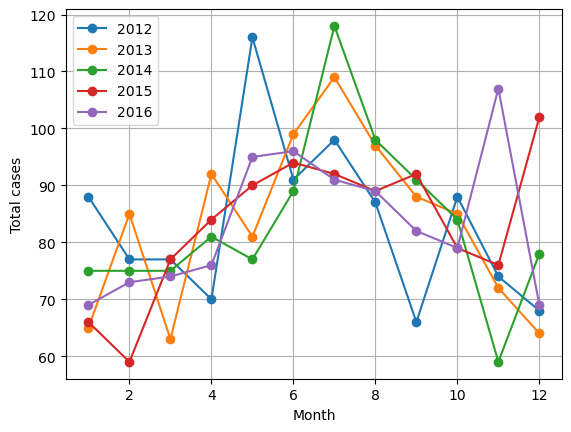

In [21]:
crime_analyse_2012=crime_analyse[crime_analyse['Year']==2012] 
crime_analyse_2013=crime_analyse[crime_analyse['Year']==2013] 
crime_analyse_2014=crime_analyse[crime_analyse['Year']==2014]
crime_analyse_2015=crime_analyse[crime_analyse['Year']==2015] 
crime_analyse_2016=crime_analyse[crime_analyse['Year']==2016] 



month_2012=crime_analyse_2012.groupby(['Month'],as_index=False).size() 
month_2013=crime_analyse_2013.groupby(['Month'],as_index=False).size() 
month_2014=crime_analyse_2014.groupby(['Month'],as_index=False).size()
month_2015=crime_analyse_2015.groupby(['Month'],as_index=False).size() 
month_2016=crime_analyse_2016.groupby(['Month'],as_index=False).size()


plt.plot(month_2012['Month'],month_2012['size'],marker='o') 
plt.plot(month_2013['Month'],month_2013['size'],marker='o') 
plt.plot(month_2014['Month'],month_2014['size'],marker='o') 
plt.plot(month_2015['Month'],month_2015['size'],marker='o')
plt.plot(month_2016['Month'],month_2016['size'],marker='o') 
plt.xlabel('Month') 
plt.ylabel('Total cases') 
plt.legend(['2012','2013','2014','2015','2016']) 
plt.grid() 
plt.show()